# Projet math-info lignes de niveau (Benjamin PIET et Antoine GAUCHOT)

In [1]:
import autograd
from autograd import numpy as np # nécessaire d'importer le numpy fourni par autograd
import matplotlib.pyplot as plt

In [2]:
def find_seed (g, c=0.0, eps =2**(-26)):
    """
    Entrées :
        g : fonction à une variable ( ici, g(y) =f(0,y) )
        eps : la précison souhaitée
    Sortie :
        si la condition n'est pas vérifiée, on renvoie None
        sinon on renvoie un t tel que g(t) = c
    """
    if not( (g(0)<= c and g(1)>=c ) or ( g(0)>= c and g(1)<=c)) :    #on vérifie si la condition est vérifiée
        return(None)
    else :      #on cherche la solution par dichotomie
        a, b= 0, 1
        if ( g(a) - c > 0) :  #et donc d'après notre hypothèse g(0,b) - c < 0
            while ( abs (g(a) - c) > eps ) :
                t = (a+b)/2
                if ( g(t) > c):
                    a=t
                else :
                    b=t
        else :  #et donc d'après notre hypothèse g(0,b) - c > 0
            while ( abs (g(a) - c) > eps ) :
                t = (a+b)/2
                if ( g(t) < c):
                    a=t
                else :
                    b=t
        return(a)


def simple_contour (f, c=0.0, delta=0.01) :
    """
    """
    N = int( 1 / delta )    #on découpe notre zone en N "intervalles" de taille delta
    X = np.array( [ delta * i for i in range(N) ] )
    Y= []
    for i in range (N) :
        def g(y) :
            return( f( X[i],y ) ) 
        t = find_seed (g, c) 
        if t != None : #on regarde à chaque "ligne horizontale" si on trouve une solution, que l'on rajoute à la liste Y
            Y.append(t)
        
    X=X[:len(Y)] #on ne garde que la liste des X où on a trouvé une solution
    return (X,Y)

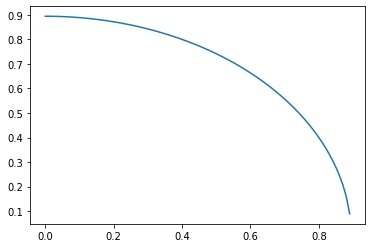

In [3]:
#Premier test
def f1(x,y):
    return x**2+y**2
X,Y=simple_contour(f1, c=0.8)
plt.plot(X,Y)
plt.show()


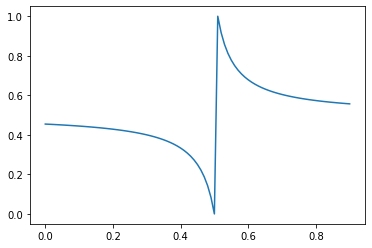

In [4]:
#Deuxième test(pour voir si il arrive à faire une fct en plusieurs "morceaux")
f00 = -1
f01 = +1.2
f10 = +1
f11 = -0.8
def f2(x, y):
    fx0 = f00 * (1 - x) + f10 * x
    fx1 = f01 * (1 - x) + f11 * x
    return fx0 * (1 - y) + fx1 * y

X,Y=simple_contour(f2, c=0)
plt.plot(X,Y)
plt.show()


In [5]:
def newton (h, X0, eps=2**(-26)) :
    """
    renvoie X tel que h(X) = 0
    """
    X=np.array(X0)
    def J_h(x,y):
        j=autograd.jacobian
        return np.c_[j(h,0)(x,y),j(h,1)(x,y)]
    while np.linalg.norm(h(X[0],X[1]))>eps:
        #print(np.linalg.norm(h(X[0],X[1])))
        #print(X[0],X[1])
        #print(J_h(X[0],X[1]))
        J_inv=np.linalg.inv(J_h(X[0],X[1]))
        X=X-J_inv.dot(h(X[0],X[1]))
    return X

def simple_contour_upgrd(f, c=0.0,delta=0.01):
    les_x=[0.0]
    les_y=[]
    def g(y) :
            return( f( les_x[0],y ) ) 
    t = find_seed (g, c)  
    if t != None :
        les_y.append(t)
    else:
        les_x.pop()
        return les_x,les_y
        
        #on a notre premier point de notre courbe. on va mtn faire la propagation
    while 0<=les_x[-1]<=1 and 0<=les_y[-1]<=1:#on s'arrète quand on sort du cadre
        xi=les_x[-1]
        yi=les_y[-1]
        Xi=np.array([xi,yi])
        #on se déplace de delta selon l'orthogonal du gradient, 
        #et on cherche une solution garce à newton en partant de ce point
        def grad_f(x,y):
            g=autograd.grad
            return np.r_[g(f,0)(x,y),g(f,1)(x,y)]
        grad=grad_f(xi,yi)
        grad_orth=np.array([grad[1],-grad[0]])
        if grad_orth[0]<0: # pour éviter d'aller vers la gauche c'est grad_orth[0] < 0, pas grad_orth[1]
            grad_orth[0],grad_orth[1]=-grad_orth[0],-grad_orth[1]
        u = grad_orth / np.linalg.norm(grad_orth) # normalisation nécessaire !
        Xg=Xi+delta*grad_orth
              
        
        def h(x,y):
            return np.array([(x-xi)**2+(y-yi)**2-delta**2,f(x,y)-c]) 
        
        x,y=newton(h,Xg)
        les_x.append(x)
        les_y.append(y)
    return les_x,les_y

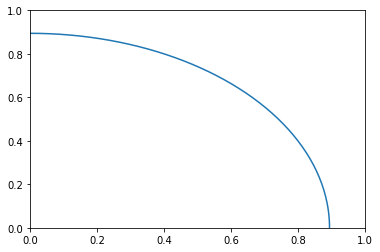

In [6]:
#Premier test
def f1(x,y):
    return x**2+y**2
X,Y=simple_contour_upgrd(f1, c=0.8)
plt.plot(X,Y)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.show()

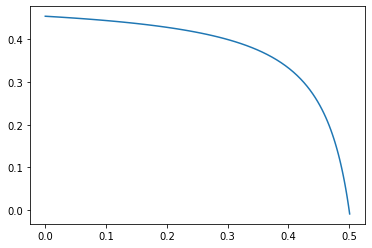

In [7]:
#Deuxième test(pour voir si il arrive à faire une fct en plusieurs "morceaux")
f00 = -1
f01 = +1.2
f10 = +1
f11 = -0.8
def f2(x, y):
    fx0 = f00 * (1 - x) + f10 * x
    fx1 = f01 * (1 - x) + f11 * x
    return fx0 * (1 - y) + fx1 * y

X,Y=simple_contour_upgrd(f2, c=0)
plt.plot(X,Y)
plt.show()


In [8]:

# Rotators
# ------------------------------------------------------------------------------
LEFT, UP, RIGHT, DOWN = 0, 1, 2, 3  # clockwise


def rotate_direction(direction, n=1):
    return (direction + n) % 4


def rotate(x, y, n=1):
    if n == 0:
        return x, y
    elif n >= 1:
        return rotate(1 - y, x, n - 1)
    else:
        assert n < 0
        return rotate(x, y, n=-3 * n)


def rotate_function(f, n=1):
    def rotated_function(x, y):
        xr, yr = rotate(x, y, -n)
        return f(xr, yr)

    return rotated_function


# Complex Contouring
# ------------------------------------------------------------------------------

# Customize the simple_contour function used in contour :
# simple_contour = smart_simple_contour


def contour(f, c, xs=[0.0, 1.0], ys=[0.0, 1.0], delta=0.01):
    curves = []
    nx, ny = len(xs), len(ys)
    for i in range(nx - 1):
        for j in range(ny - 1):
            xmin, xmax = xs[i], xs[i + 1]
            ymin, ymax = ys[j], ys[j + 1]

            def f_cell(x, y):
                return f(xmin + (xmax - xmin) * x, ymin + (ymax - ymin) * y)

            done = set()
            for n in [0, 1, 2, 3]:
                if n not in done:
                    rotated_f_cell = rotate_function(f_cell, n)
                    x_curve_r, y_curve_r = simple_contour_upgrd(rotated_f_cell, c, delta)
                    exit = None
                    if len(x_curve_r) >= 1:
                        xf, yf = x_curve_r[-1], y_curve_r[-1]
                        if xf == 0.0:
                            exit = LEFT
                        elif xf == 1.0:
                            exit = RIGHT
                        elif yf == 0.0:
                            exit = DOWN
                        elif yf == 1.0:
                            exit = UP
                    if exit is not None:  # a fully successful contour fragment
                        exit = rotate_direction(exit, n)
                        done.add(exit)

                    x_curve, y_curve = [], []
                    for x_r, y_r in zip(x_curve_r, y_curve_r):
                        x, y = rotate(x_r, y_r, n=-n)
                        x_curve.append(x)
                        y_curve.append(y)
                    x_curve = np.array(x_curve)
                    y_curve = np.array(y_curve)
                    curves.append(
                        (xmin + (xmax - xmin) * x_curve, ymin + (ymax - ymin) * y_curve)
                    )
    return curves

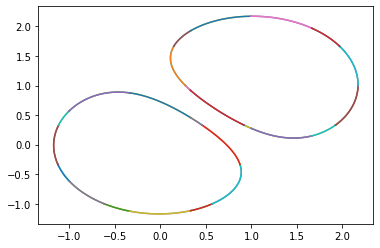

In [9]:
#Test pour la fct contour
def f(x,y):
    return 2*(np.exp(-x**2-y**2)-np.exp(-(x-1)**2-(y-1)**2))
C=[-0.5,0.5]
xc=np.linspace(-3,3,10)
yc=np.linspace(-3,3,10)

for c in C:
    level_curves = contour(f, c, xc, yc) 
    for x, y in level_curves:
        plt.plot(x, y)
plt.show()

